# Tiền xử lí
 

In [ ]:
!python --v

In [1]:
import paddle

ModuleNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import os
import json
from google.colab.patches import cv2_imshow
import cv2 as cv
import copy
import numpy as np
import json

In [ ]:
%cd /gdrive/MyDrive/CS231_report/Colab
os.getcwd()

/gdrive/MyDrive/CS231_report/Colab


'/gdrive/MyDrive/CS231_report/Colab'

In [ ]:
!git clone https://github.com/PaddlePaddle/PaddleOCR

fatal: destination path 'PaddleOCR' already exists and is not an empty directory.


In [ ]:
!pip install -r ./PaddleOCR/requirements.txt
!pip install paddlepaddle-GPU

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 576.1 MB 9.5 kB/s 
     |████████████████████████████████| 373 kB 67.7 MB/s 


In [ ]:
!wget https://paddleocr.bj.bcebos.com/dygraph_v2.0/en/det_r50_vd_sast_icdar15_v2.0_train.tar -P ./pretrain_models
!tar -xf ./pretrain_models/det_r50_vd_sast_icdar15_v2.0_train.tar -C ./pretrain_models

--2022-05-23 14:22:17--  https://paddleocr.bj.bcebos.com/dygraph_v2.0/en/det_r50_vd_sast_icdar15_v2.0_train.tar
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 220.181.33.43, 220.181.33.44, 2409:8c04:1001:1002:0:ff:b001:368a
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|220.181.33.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1041520640 (993M) [application/x-tar]
Saving to: ‘./pretrain_models/det_r50_vd_sast_icdar15_v2.0_train.tar.1’

det_r50_vd_sast_icd 100%[===================>] 993.27M  16.0MB/s    in 79s     

2022-05-23 14:23:37 (12.6 MB/s) - ‘./pretrain_models/det_r50_vd_sast_icdar15_v2.0_train.tar.1’ saved [1041520640/1041520640]



In [ ]:
dir_data = './dataset' 
dir_labels = dir_data + '/labels' 
dir_img_train = dir_data + '/train_images' 
dir_img_test = dir_data + '/test_images' 

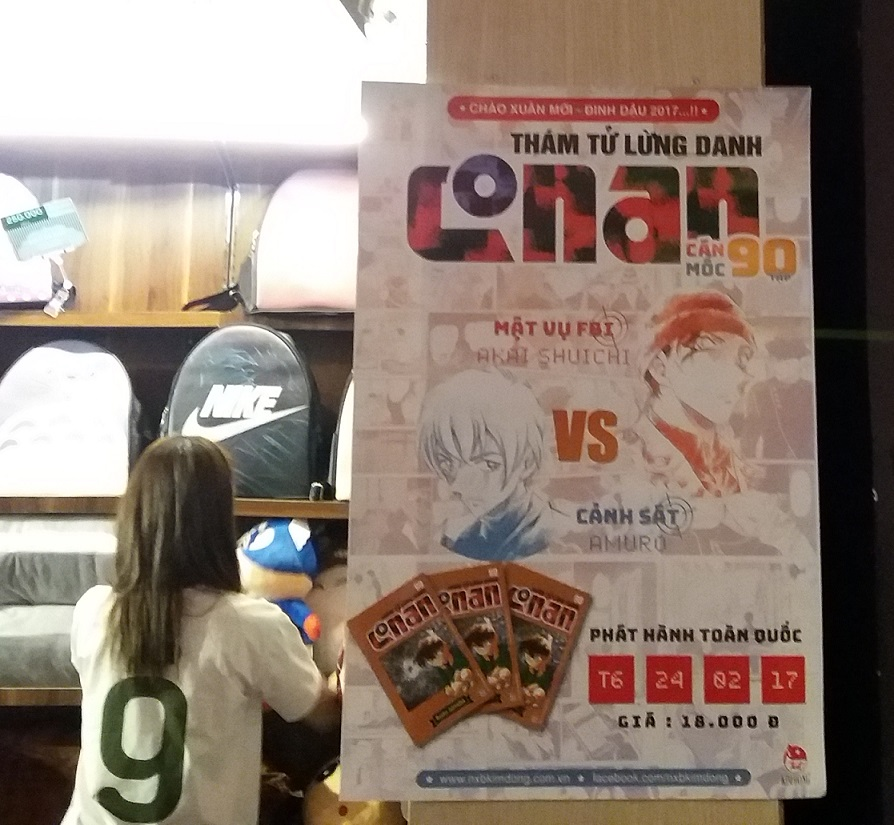

469,99,505,99,506,116,470,115,CHÀO
507,100,546,100,546,116,508,115,XUÂN
547,101,574,101,573,116,549,116,MỚI
581,101,616,102,616,118,585,117,ĐINH
621,101,647,101,647,118,620,117,DẬU
648,102,680,102,678,117,651,116,2017
689,102,699,103,699,118,689,118,11
508,123,579,125,580,156,509,155,THÁM
586,122,622,124,619,158,589,157,TỪ
623,127,690,129,689,155,622,156,LỪNG
696,133,762,132,762,158,694,157,DANH
685,236,722,236,726,256,687,258,CÁN
685,258,725,256,725,276,684,276,MỐC
728,234,797,236,797,275,732,277,90
767,272,791,273,791,282,769,281,TẬP
452,150,521,157,516,219,451,215,O
525,162,681,165,680,269,521,267,NA
684,163,761,165,761,236,684,237,N
493,313,537,314,537,341,491,341,MẬT
541,317,573,317,570,344,541,342,VỤ
578,318,613,320,614,339,576,337,FBI
478,342,529,343,531,366,475,365,AKAI
538,345,628,343,631,368,537,366,SHUICHI
551,402,621,404,623,463,555,464,VS
571,498,632,500,634,527,575,525,CẢNH
636,501,680,502,679,526,637,526,SÁT
586,532,666,535,667,556,585,555,AMURU
589,620,637,620,637,642,5

In [ ]:
img_path = os.path.join(dir_img_train, 'im1186.jpg')
img = cv.imread(img_path)
cv2_imshow(img)
anovation_temp = os.path.join(dir_labels, 'gt_1186.txt')
content = open(anovation_temp, "r")
print(content.read())

In [ ]:
train_label = open(dir_data +'/'+ "train_label.txt","w")
test_label = open(dir_data +'/'+ "test_label.txt","w")
path_file = os.listdir(dir_labels)
for txt in path_file:
  with open(dir_labels +'/'+ txt) as f:
      content = f.readlines()
      f.close()
  content = [x.strip() for x in content]
  text = []
  for i in content:
    label = {}
    i = i.split(',')
    label['transcription'] = i[-1]
    label['points'] = [[i[0],i[1]],[i[2],i[3]], [i[4],i[5]],[i[6],i[7]]]
    text.append(label)
  text = json.dumps(text, ensure_ascii = False)
  img_name = txt.split('.')[0].split('_')[1]
  int_img = int(img_name)
  img_name = 'im' + "{:04n}".format(int_img) + '.jpg'
  if int_img > 1200:
    test_label.write( img_name+ '\t'+f'{text}' + '\n')
  else:
    train_label.write( img_name+ '\t'+f'{text}' + '\n')

# Training

In [ ]:
!python3 ./PaddleOCR/tools/train.py -c ./config/detection/SAST.yml  -o Global.pretrained_model=./pretrain_models/det_r50_vd_sast_icdar15_v2.0_train/best_accuracy

Streaming output truncated to the last 5000 lines.
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
[2022/05/12 04:12:47] ppocr INFO: epoch: [71/100], global_step: 2688, lr: 0.001000, loss: 0.254230, score_loss: 0.108848, border_loss: 0.024161, tvo_loss: 0.054192, tco_loss: 0.023335, avg_reader_cost: 2.19538 s, avg_batch_cost: 3.33327 s, avg_samples: 8.0, ips: 2.40005 samples/s, eta: 0:54:47
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
[2022/05/12 04:12:50] ppocr INFO: epoch: [71/100], globa

In [ ]:
!python3 ./PaddleOCR/tools/train.py -c ./config/detection/SAST.yml    \
    -o Global.checkpoints=./output/save_model_dir/latest 

Streaming output truncated to the last 5000 lines.
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
invalid poly
[2022/05/15 05:25:04] ppocr INFO: epoch: [88/100], global_step: 3341, lr: 0.001000, loss: 0.156485, score_loss: 0.079925, border_loss: 0.013591, tvo_loss: 0.028713, tco_loss: 0.011100, avg_reader_cost: 1.46524 s, avg_batch_cost: 2.54252 s, avg_samples: 8.0, ips: 3.14649 samples/s, eta: 0:23:10
[2022/05/15 05:25:07] ppocr INFO: epoch: [88/100], global_step: 3342, lr: 0.001000, loss: 0.156

# Evaluation, export and test

In [ ]:
!python3 ./PaddleOCR/tools/eval.py -c ./config/detection/SAST.yml  -o Global.checkpoints=./output/save_model_dir/latest  \
                                                                              Global.use_gpu=False

/usr/local/lib/python3.7/dist-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/usr/local/lib/python3.7/dist-packages/scipy/special/orthogonal.py:81: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from numpy import (exp, inf, pi, sqrt, floor, sin, cos, around, int,
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sc

In [ ]:
!python3 ./PaddleOCR/tools/eval.py -c ./config/recognition/REC.yml -o Global.checkpoints=./output/save_model_dir_rec/latest Global.use_gpu=False

/usr/local/lib/python3.7/dist-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/usr/local/lib/python3.7/dist-packages/scipy/special/orthogonal.py:81: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from numpy import (exp, inf, pi, sqrt, floor, sin, cos, around, int,
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sc

Inference

In [ ]:
!python3 ./PaddleOCR/tools/export_model.py -c ./config/detection/SAST.yml \
                                                  -o Global.pretrained_model=./output/save_model_dir/latest \
                                                     Global.save_inference_dir=./inference/SAST

In [ ]:
!python3 ./PaddleOCR/tools/infer/predict_det.py       --det_algorithm=SAST              \
                                                      --det_model_dir=./inference/SAST  \
                                                      --image_dir=/gdrive/MyDrive/CS231_report/Colab/dataset/word.png  \
                                                      --use_gpu=False


/usr/local/lib/python3.7/dist-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/usr/local/lib/python3.7/dist-packages/scipy/special/orthogonal.py:81: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from numpy import (exp, inf, pi, sqrt, floor, sin, cos, around, int,
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sc

In [ ]:
def get_rotate_crop_image(img, points):
    img_crop_width = int(max(
                              np.linalg.norm(points[0] - points[1]),
                              np.linalg.norm(points[2] - points[3])
                            )
                        )
    img_crop_height = int(max(np.linalg.norm(points[0] - points[3]),
                              np.linalg.norm(points[1] - points[2])
                              )
                        )
    centre_points = np.float32([[0, 0], [img_crop_width, 0],
                          [img_crop_width, img_crop_height],
                          [0, img_crop_height]])
    M = cv.getPerspectiveTransform(points, centre_points)
    dst_img = cv.warpPerspective(img, M, (img_crop_width, img_crop_height))
    return dst_img

In [ ]:
def save_crop_rec_res( img_crop_list, img_name):
        bbox_num = len(img_crop_list)
        for i in range(bbox_num):
          crop_name=img_name+'_'+str(i)+'.jpg'
          crop_name_w = "./dataset/img_crop/{}".format(crop_name)
          cv.imwrite(crop_name_w, img_crop_list[i])
          crop_label.write("{0}\t{1}\n".format(crop_name, text[i]))

In [ ]:
crop_label = open('./dataset/crop_label.txt','w')
with open('./dataset/train_label.txt','r') as file_text:
  img_files=file_text.readlines()
for img_file in img_files:
  content = json.loads(img_file.split('\t')[1].strip())
  dt_boxes=[]
  text=[]
  for i in content:
    if i['transcription'] == "###":
      continue
    point = np.array(i['points'],dtype=np.float32)
    dt_boxes.append(point)
    text.append(i['transcription'])
  image_file = './dataset/train_images/' +img_file.split('\t')[0]
  img = cv.imread(image_file)
  ori_im=img.copy()
  img_crop_list=[]
  for bno in range(len(dt_boxes)):
    tmp_box = copy.deepcopy(dt_boxes[bno])
    img_crop = get_rotate_crop_image(ori_im, tmp_box)
    img_crop_list.append(img_crop)
  img_name = img_file.split('\t')[0].split('.')[0]
  save_crop_rec_res(img_crop_list,img_name)

In [ ]:
!python3 ./PaddleOCR/tools/train.py -c ./config/recognition/REC.yml \
                                        

In [ ]:
!python3 ./PaddleOCR/tools/train.py -c ./config/recognition/REC.yml -o Global.checkpoints=./output/save_model_dir_rec/best_accuracy

In [ ]:
!python3 ./PaddleOCR/tools/eval.py -c ./config/recognition/REC.yml -o Global.pretrained_model=./output/save_model_dir_rec/best_accuracy  Global.use_gpu=False

/usr/local/lib/python3.7/dist-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/usr/local/lib/python3.7/dist-packages/scipy/special/orthogonal.py:81: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from numpy import (exp, inf, pi, sqrt, floor, sin, cos, around, int,
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sc

In [ ]:
!python3 ./PaddleOCR/tools/export_model.py -c ./config/recognition/REC.yml -o Global.pretrained_model=./output/save_model_dir_rec/best_accuracy  Global.use_gpu=False

In [ ]:
!python3 ./PaddleOCR/tools/infer/predict_system.py    --use_gpu="True" \
                                                      --det_algorithm="SAST"  \
                                                      --det_model_dir="./inference/SAST"  \
                                                      --rec_algorithm="SRN" \
                                                      --rec_model_dir="./inference/SRN/"  \
                                                      --image_dir="/gdrive/MyDrive/CS231_report/Colab/re.jpg" \
                                                      --rec_char_dict_path="./dataset/vn_dictionary.txt" \
                                                      --rec_image_shape="1, 64, 256"\

/usr/local/lib/python3.7/dist-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/usr/local/lib/python3.7/dist-packages/scipy/special/orthogonal.py:81: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from numpy import (exp, inf, pi, sqrt, floor, sin, cos, around, int,
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sc

In [ ]:
output_text = open('./inference_results/text.txt','w')
with open('./inference_results/system_results.txt','r') as file_text:
  img_files=file_text.readlines()
for img_file in img_files:
  content = json.loads(img_file.split('\t')[1].strip())
  for i in content:
    output_text.write(i['transcription'] + " ")